# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split.

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [1]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import re

In [34]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))
    #print(raw_data)

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))


# Question 1: Input and Basic preprocessing (10 marks)

In [3]:
def parse_data_line(data_line):
    # Should return a tuple of the label as just positive or negative and the statement
    # e.g. (label, statement)
    #for each line, the label is the second item and the statement is the third
    label = data_line[1]
    statement = data_line[2]
    return (label, statement)

In [4]:

# Input: a string of one statement
def pre_process(text):
    # Should return a list of tokens
    # DESCRIBE YOUR METHOD IN WORDS
    # Converting the text to lowercase
    text = text.lower()

    #Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    #Tokenize by splitting on whitespace
    tokens = text.split()

    return tokens



# Question 2: Basic Feature Extraction (20 marks)

In [5]:
global_feature_dict = {} # A global dictionary of features

def to_feature_vector(tokens):
    # Should return a dictionary containing features as keys, and weights as values
    # DESCRIBE YOUR METHOD IN WORDS
    feature_vector = {}
    for token in tokens:
        #each token is given a weight of 1
        feature_vector[token] = 1
        # Updating global_feature_dict, for new words, the value be the length of the dict so we can see at what number we encountered the new word and it will work as a unique ID
        if token not in global_feature_dict:
            global_feature_dict[token] = len(global_feature_dict)

    return feature_vector

In [6]:
to_feature_vector(pre_process("hello world!! hello123"))

{'hello': 1, 'world': 1, 'hello123': 1}

In [7]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [8]:
#solution
from sklearn.metrics import classification_report, accuracy_score

#function prints the classification report for each fold being tested and returns the average result of all folds
def cross_validate(dataset, folds):
    results = {'precision': 0, 'recall': 0, 'f1_score': 0, 'accuracy': 0}
    fold_size = int(len(dataset)/folds) + 1

    count=0

    for i in range(0,len(dataset),int(fold_size)):
        count = count+1
        # insert code here that trains and tests on the 10 folds of data in the dataset
        print("Fold start on items %d - %d" % (i, i+fold_size))
        # FILL IN THE METHOD HERE
        #training on dataset[:i]+dataset [i+foldsize], which will be 9/10 of the training data
        classifier = train_classifier(dataset[:i] + dataset[i+fold_size:])
        #testing the trained classifier on dataset[i:i+folsize], or on 1/10 training data
        test_pred = predict_labels([x[0] for x in dataset[i:i+fold_size]], classifier) #labels the classifier predicts
        #actual labels
        test_true = [t[1] for t in dataset[i:i+fold_size]]
        #reporting precision, recall, f1_score
        fold_report = classification_report(test_true, test_pred, output_dict=True)
        #reporting accuracy
        fold_accuracy = accuracy_score(test_true, test_pred)

        #printing metrics for eaxch fold
        print(f'fold {count} report: ')
        print(fold_report["weighted avg"])
        print("Accuracy: ", fold_accuracy)
        print(("_"*50))

        #adding all precision of different folds to have their sum, inorder to report the final precision as an average of precisions in all iterations
        results['precision'] += fold_report['weighted avg']['precision']
        #adding all recalls of different folds to have their sum, inorder to report the final recall as an average of recalls in all iterations
        results['recall'] += fold_report['weighted avg']['recall']
        #adding all f_1 scores of different folds to have their sum, inorder to report the final f1 score as an average of f1 scores in all iterations
        results['f1_score'] += fold_report['weighted avg']['f1-score']
        #adding all accuracies of different folds to have their sum, inorder to report the final accuracy as an average of accuracies in all iterations
        results['accuracy'] += fold_accuracy

    results['precision'] /= folds
    results['recall'] /= folds
    results['f1_score'] /= folds
    results['accuracy'] /= folds


    return results

In [9]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [11]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'sentiment-dataset.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path)

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
62249


In [12]:
train_data[0]

({'literally': 1,
  'so': 1,
  'excited': 1,
  'im': 1,
  'going': 1,
  'to': 1,
  'a': 1,
  'sam': 1,
  'smith': 1,
  'concert': 1,
  'in': 1,
  'october': 1},
 'positive')

In [13]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Fold start on items 0 - 2684
Training Classifier...
fold 1 report: 
{'precision': 0.8437591582767621, 'recall': 0.8453800298062594, 'f1-score': 0.8444082337459935, 'support': 2684.0}
Accuracy:  0.8453800298062594
__________________________________________________
Fold start on items 2684 - 5368
Training Classifier...
fold 2 report: 
{'precision': 0.8521254153112297, 'recall': 0.8535767511177347, 'f1-score': 0.8528084858366485, 'support': 2684.0}
Accuracy:  0.8535767511177347
__________________________________________________
Fold start on items 5368 - 8052
Training Classifier...
fold 3 report: 
{'precision': 0.8031204711107905, 'recall': 0.8036512667660208, 'f1-score': 0.8033526848405785, 'support': 2684.0}
Accuracy:  0.8036512667660208
__________________________________________________
Fold start on items 8052 - 10736
Training Classifier...
fold 4 report: 
{'precision': 0.843583699938909, 'recall': 0.8427719821162444, 'f1-score': 0.8426352809497366, 'support': 2684.0}
Accuracy:  0.842

{'precision': 0.8419443084212455,
 'recall': 0.8429527577472884,
 'f1_score': 0.8422253736005901,
 'accuracy': 0.8429527577472884}

# Question 4: Error Analysis (20 marks)

In [39]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')

    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

In [69]:

def error_analysis(dataset, labels = ["positive","negative"],folds=10):
    # using the first fold for analysis
    fold_size = int(len(dataset) / folds) + 1

    #train the classifier on the first 9 folds
    classifier = train_classifier(dataset[fold_size:])
    #making predictions on the test data (1 fold) with the trained classifier
    test_pred = predict_labels([x[0] for x in dataset[:fold_size]], classifier)
    test_true = [t[1] for t in dataset[:fold_size]]

    #print(test_pred)
    #visualizing the confusion matrix
    confusion_matrix_heatmap(test_true, test_pred, labels=labels)

    #gathering false positives and false negatives
    false_positives = []
    false_negatives = []

    #features and raw data of the testing fold
    test_data = dataset[:fold_size]
    raw_test = raw_data[:fold_size]

    for i, (true_label, pred_label) in enumerate(zip(test_true, test_pred)):
        #print(f"True Label: {true_label}, Predicted Label: {pred_label}")
        if true_label == "positive" and pred_label =="negative":  # False Negative
            #print(i)
            false_negatives.append((test_data[i],raw_test[i]))
        elif true_label == "negative" and pred_label == "positive":  # False Positive
            false_positives.append((test_data[i],raw_test[i]))


    with open("false_positive_error_analysis.txt", "w") as fp_file:
        for data,raw in false_positives:
            features, label = data
            raw_sentence,_ = raw
            fp_file.write(f"False Positive: Original Text: {raw_sentence} -- Actual Label: {label} \n")
            fp_file.write(f"Extracted Features: {features}\n\n")

    with open("false_negative_error_analysis.txt", "w") as fn_file:
        for data,raw in false_negatives:
            features, label = data
            raw_sentence,_ = raw
            fn_file.write(f"False Negative: Original Text: {raw_sentence} -- Actual Label: {label} \n")
            fn_file.write(f"Extracted Features: {features}\n\n")

    #metrics from confusion matrix and classification report
    report = classification_report(test_true, test_pred, output_dict=True)
    print(classification_report(test_true, test_pred))

    # Analysis output
    false_positives_count = sum(1 for true, pred in zip(test_true, test_pred) if true != "positive" and pred == "positive")
    false_negatives_count = sum(1 for true, pred in zip(test_true, test_pred) if true == "positive" and pred != "positive")

    print(f"False Positives: {false_positives_count}")
    print(f"False Negatives: {false_negatives_count}")

    print(f"Total actual poitive Samples: {np.sum(np.array(test_true) == 'positive')}")
    print(f"Total actual negative Samples: {np.sum(np.array(test_true) == 'negative')}")

    return report

Training Classifier...


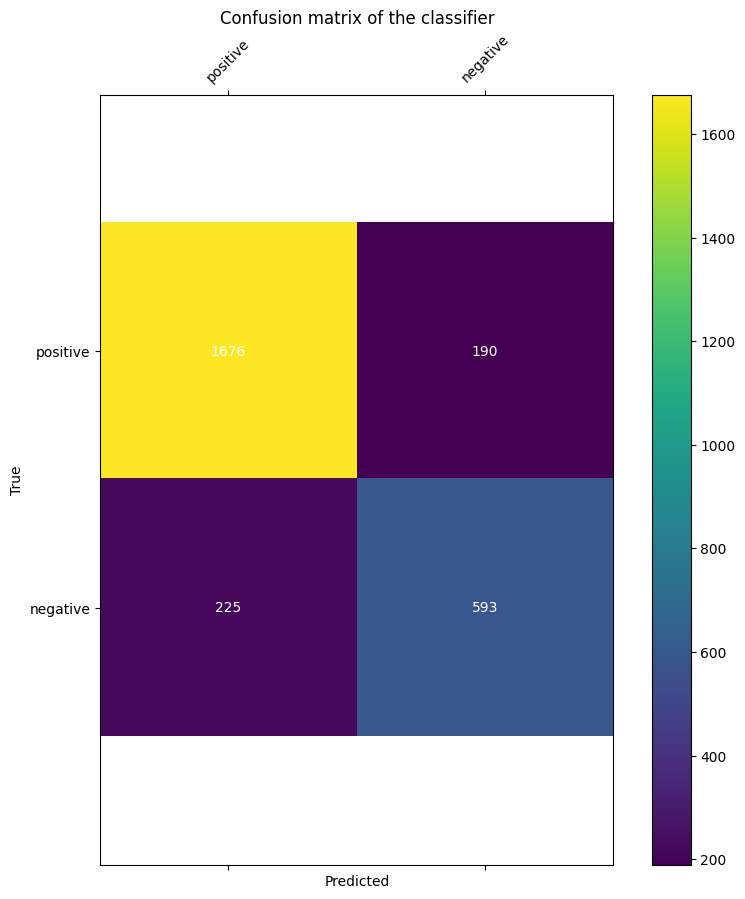

              precision    recall  f1-score   support

    negative       0.76      0.72      0.74       818
    positive       0.88      0.90      0.89      1866

    accuracy                           0.85      2684
   macro avg       0.82      0.81      0.82      2684
weighted avg       0.84      0.85      0.84      2684

False Positives: 225
False Negatives: 190
Total actual poitive Samples: 1866
Total actual negative Samples: 818


{'negative': {'precision': 0.7573435504469987,
  'recall': 0.7249388753056235,
  'f1-score': 0.740787008119925,
  'support': 818.0},
 'positive': {'precision': 0.8816412414518674,
  'recall': 0.8981779206859593,
  'f1-score': 0.8898327581629945,
  'support': 1866.0},
 'accuracy': 0.8453800298062594,
 'macro avg': {'precision': 0.8194923959494331,
  'recall': 0.8115583979957914,
  'f1-score': 0.8153098831414598,
  'support': 2684.0},
 'weighted avg': {'precision': 0.8437591582767621,
  'recall': 0.8453800298062594,
  'f1-score': 0.8444082337459935,
  'support': 2684.0}}

In [70]:

error_analysis(train_data, labels = ["positive","negative"],folds=10)

In [38]:
raw_data[0]

("Literally so excited I'm going to a Sam Smith concert in October",
 'positive')

In [37]:
test_data[0]

({'tomorrow': 1,
  'well': 1,
  'release': 1,
  'our': 1,
  '58th': 1,
  'episode': 1,
  'of': 1,
  'hsonair': 1,
  'profiling': 1,
  'very': 1,
  'own': 1,
  'alissadossantos': 1,
  'talk': 1,
  'about': 1,
  'storytelling': 1,
  'and': 1,
  'beyonce': 1},
 'positive')

# Questions 5: Optimising pre-processing and feature extraction (30 marks)

**Note:** it is advisable to implement question 5 in a separate notebook where you further develop the pre-processing and feature extraction functions you implemented above.

In [ ]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = False  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])